### Import Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

### Create some Data

In [52]:
X1 = np.random.rand(50, 2)
X2= 2 + np.random.rand(50,2)
X3 = np.concatenate((2 + np.random.rand(50,1), np.random.rand(50,1)), axis = 1)
X4 = np.concatenate((np.random.rand(50,1), 2 + np.random.rand(50,1)), axis = 1)
X5 = 1.5 + np.random.uniform(-0.3,0.3, [50, 2])
mat= np.concatenate((X1,X2,X3,X4,X5))
print(len(mat))

250


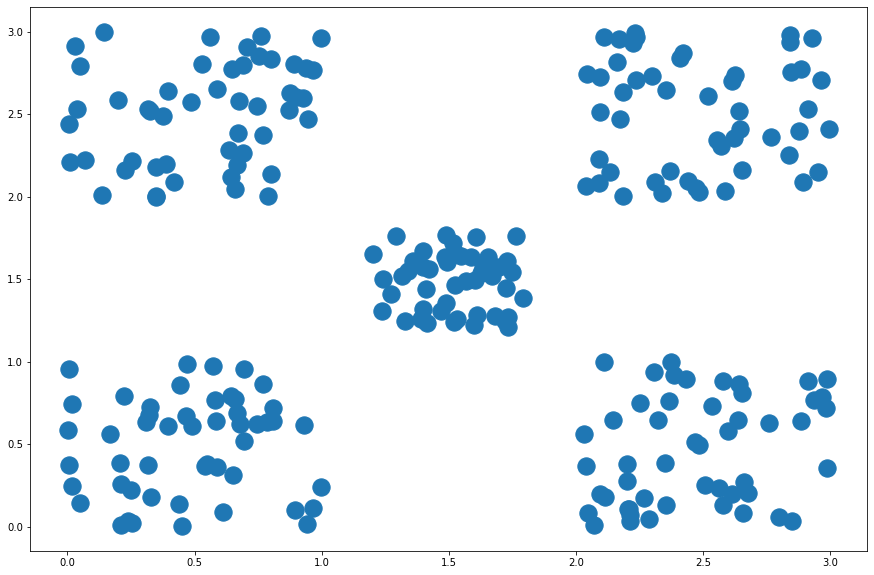

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(mat[:,0], mat[:,1], s =300)
plt.show()

### Let's Create some Functions

In [54]:
def plot_2dclusters(X, centroids, label, pause=0.25):
    clear_output()
    plt.figure(figsize=(15, 10))
    plt.scatter(X[:,0],X[:,1], c = label, s =300)
    plt.scatter(centroids[:,0], centroids[:,1], marker= 'X', s =800)
    plt.show()
    plt.pause(pause)

In [55]:
def k_means(mat, n_clusters = 1, threshold = 0.005, plot = True, pause = 1):
    centroids = np.random.uniform(0,3, size = [n_clusters, mat.shape[1]])
    distances = cdist(mat, centroids ,'euclidean')
    labels = np.array([np.argmin(i) for i in distances])
    if plot:
        plot_2dclusters(mat, centroids, labels, pause=pause)
    cont = True
    while cont:
        orig_cent = np.array(centroids, copy=True)
        centroids = []
        for i in range(n_clusters):
            temp_cent = mat[labels==i].mean(axis=0) 
            centroids.append(temp_cent)

        centroids = np.vstack(centroids)
        distances = cdist(mat, centroids ,'euclidean')
        labels = np.array([np.argmin(i) for i in distances])
        if plot:
            plot_2dclusters(mat, centroids, labels, pause=pause)
            
        cont = np.linalg.norm(centroids - orig_cent) > threshold
    
    return labels


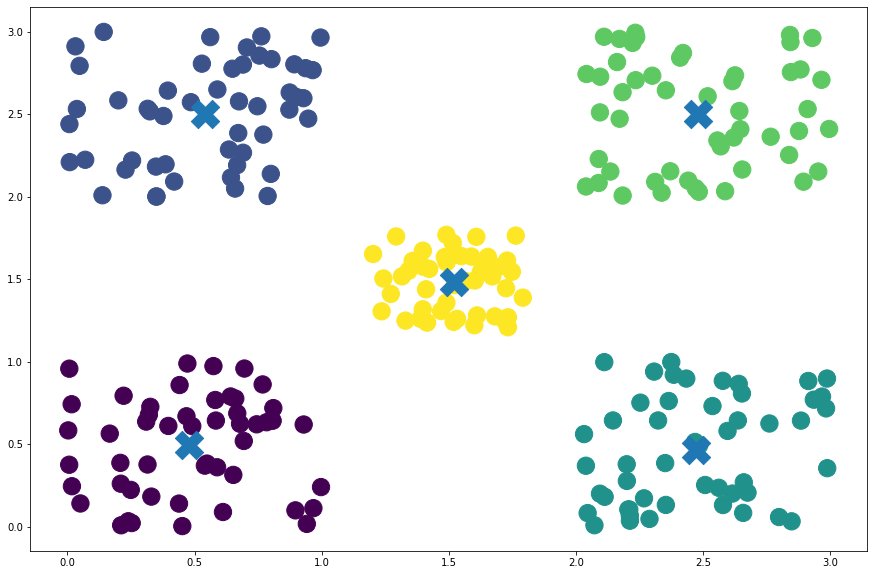

In [57]:
labels = k_means(mat,5, pause= 1)

In [58]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

### Recall Definition


$$ s(o) = \dfrac{b(o) - a(o)}{max(b(o),a(o))} $$

$$ $$

$$\text{a(o) is the mean of the intra-cluster distance}$$


$$\text{b(o) is the mean of the inter-cluster distance}$$

### Get One Single Point

In [59]:
idx = 0
point = np.reshape(mat[idx], (-1, 2))
label = labels[idx]
print(point, label)

[[0.67858064 0.62474925]] 0


### Remove point and label from data

In [60]:
print("Length of data: ",len(mat))
print("Length of labels: ",len(labels))
mat_r = mat[np.arange(len(mat))!=idx]
labels_r = labels[np.arange(len(labels))!=idx]
print("\nLength of subsetted data: ",len(mat_r))
print("Length of subsetted labels: ",len(labels_r))

Length of data:  250
Length of labels:  250

Length of subsetted data:  249
Length of subsetted labels:  249


### Get distances from point

In [61]:
distances = cdist(mat_r ,point,'euclidean')
print("Length of distances array: ",len(distances))
distances[0:10]

Length of distances array:  249


array([[0.36457944],
       [0.67257803],
       [0.28218153],
       [0.53957369],
       [0.74960366],
       [0.73681609],
       [0.77223633],
       [0.66061324],
       [0.51576922],
       [0.41946397]])

## Calculate a(o)

### Subset distances array by points in same cluster and take mean

In [62]:
a_dist = distances[labels_r == label]
print(a_dist[0:10], '\n')
a = np.mean(a_dist)
print("a(o) = ", a)

[[0.36457944]
 [0.67257803]
 [0.28218153]
 [0.53957369]
 [0.74960366]
 [0.73681609]
 [0.77223633]
 [0.66061324]
 [0.51576922]
 [0.41946397]] 

a(o) =  0.4182876661107139


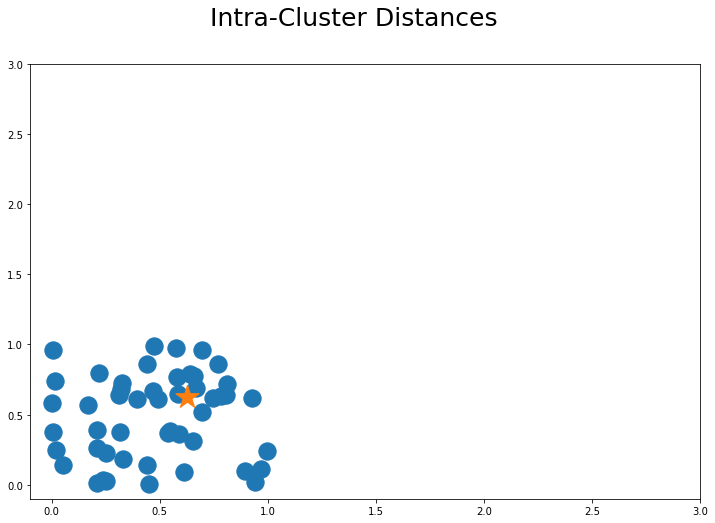

In [63]:
plt.figure(figsize=(12, 8))
plt.scatter(mat_r[labels_r == label][:,0], mat_r[labels_r == label][:,1], s =300)
plt.scatter(point[:,1], point[:,1], marker= '*', s =600)
plt.xlim(-0.1,3)
plt.ylim(-0.1,3)
plt.suptitle("Intra-Cluster Distances", fontsize =25)
plt.show()

## Calculate b(o)

### Subset Distances Array by Points Not In Same Cluster, Take Mean, and Find Min

In [64]:
b_dist = cdist(mat_r[labels_r != label] ,point,'euclidean')
print("distances to points in other clusters: \n", b_dist[0:10])
cent_dist = [np.mean(distances[labels_r == lab]) for lab in set(labels) if lab != label ]
print("\nmean distances to other clusters: ",cent_dist)
b = cent_dist[np.argmin(cent_dist)]
print("\nminimum mean distance to other clusters: ", b)

distances to points in other clusters: 
 [[2.62313037]
 [2.51816169]
 [2.5087258 ]
 [2.52850661]
 [2.76713244]
 [2.50377736]
 [2.70387574]
 [2.74598417]
 [2.16947527]
 [2.29633207]]

mean distances to other clusters:  [1.9026158257211927, 1.8279079950187833, 2.6174061718860497, 1.2149466175905013]

minimum mean distance to other clusters:  1.2149466175905013


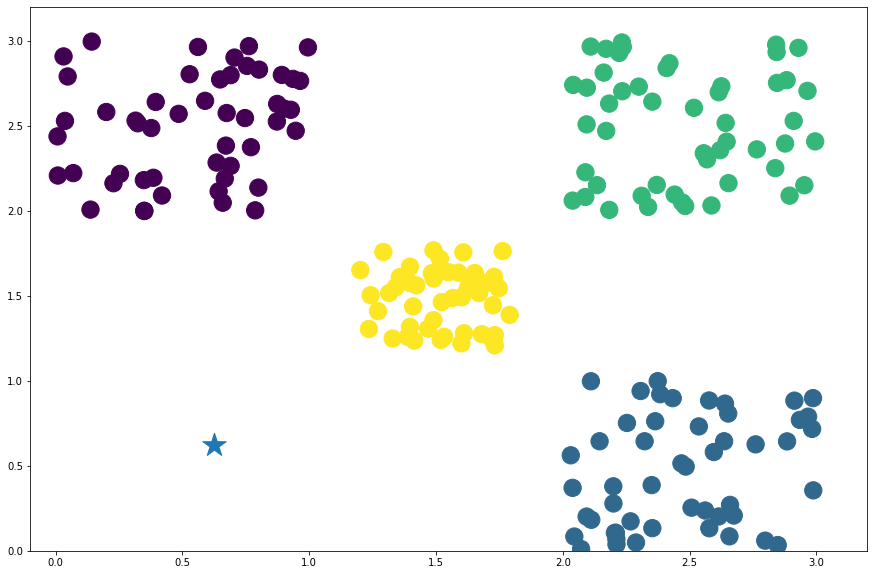

In [65]:
plt.figure(figsize=(15, 10))
plt.scatter(mat_r[labels_r != label][:,0], mat_r[labels_r != label][:,1], c = labels_r[labels_r != label], s =300)
plt.scatter(point[:,1], point[:,1], marker= '*', s =600)
plt.xlim(-0.1,3.2)
plt.ylim(0,3.2)
plt.show()

### Calculate Silhouette Coefficient

In [66]:
print((b -a)/max(a,b))

0.6557151894127927


### Put This In a Function

In [67]:
def sil_samples(mat, labels, idx):
    #get point and label
    point = np.reshape(mat[idx], (-1, 2))
    label = labels[idx]
    #remove indexed point
    mat_r = mat[np.arange(len(mat))!=idx]
    labels_r = labels[np.arange(len(labels))!=idx]
    
    #get distances from point
    distances = cdist(mat_r ,point,'euclidean')

    #subset by distances in same cluster and take mean
    a_dist = distances[labels_r == label]
    a = np.mean(a_dist)

    #subset by distances not in same cluster
    b_dist = cdist(mat_r[labels_r != label] ,point,'euclidean')
    #find mean distances from each other cluster to point
    cent_dist = [np.mean(distances[labels_r == lab]) for lab in set(labels) if lab != label ]
    #find the minimum mean distance
    b = cent_dist[np.argmin(cent_dist)]

    return (b -a)/max(a,b)

### Confirm Results with sklearn

In [68]:
sil_samples(mat,labels,0)

0.6557151894127927

In [69]:
silhouette_vals = silhouette_samples(mat,labels, metric= 'euclidean')
silhouette_vals[0]

0.6557151894127926

### Calculate Mean Silhouette Coefficent

In [70]:
def sil_score(mat, labels):
    score = 0
    for idx in range(len(mat)):
        score += sil_samples(mat,labels,idx)
    score = score/len(mat)
    return(score)

### Confirm Results with sklearn

In [71]:
sil_score(mat,labels)

0.6384634047825044

In [72]:
sk_sil_score = silhouette_score(mat,labels, metric= 'euclidean')
sk_sil_score

0.6384634047825047

### Determine Best Cluster

In [73]:
scores = []
n_clusters = np.array([i for i in range(2,10)])
for n in n_clusters:
    km_model = KMeans(n)
    labels = km_model.fit_predict(mat)
    
    scores.append(silhouette_score(mat,labels))

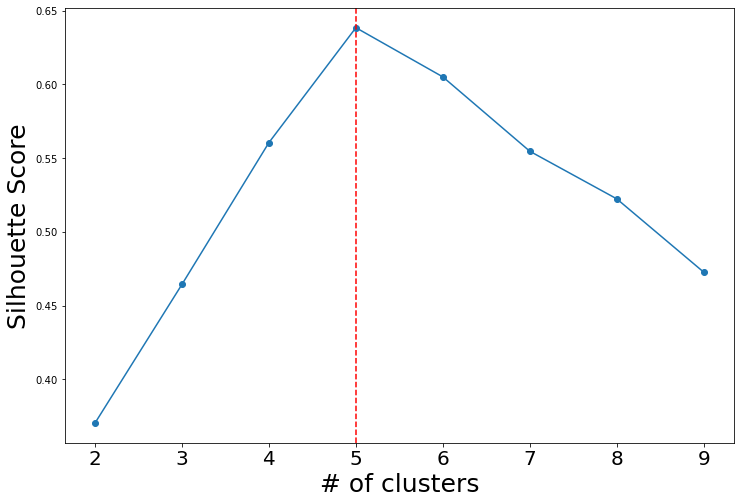

In [74]:
plt.figure(figsize=(12,8))
plt.plot(n_clusters, scores, marker = 'o')
plt.xlabel("# of clusters", fontsize = 25)
plt.ylabel("Silhouette Score", fontsize = 25)
plt.xticks(fontsize = 20)
plt.axvline(5, color = "red", linestyle="--")
plt.show()

### Silhouette Plots

In [75]:
km_model = KMeans(3)
labels = km_model.fit_predict(mat)
centroids  = km_model.cluster_centers_

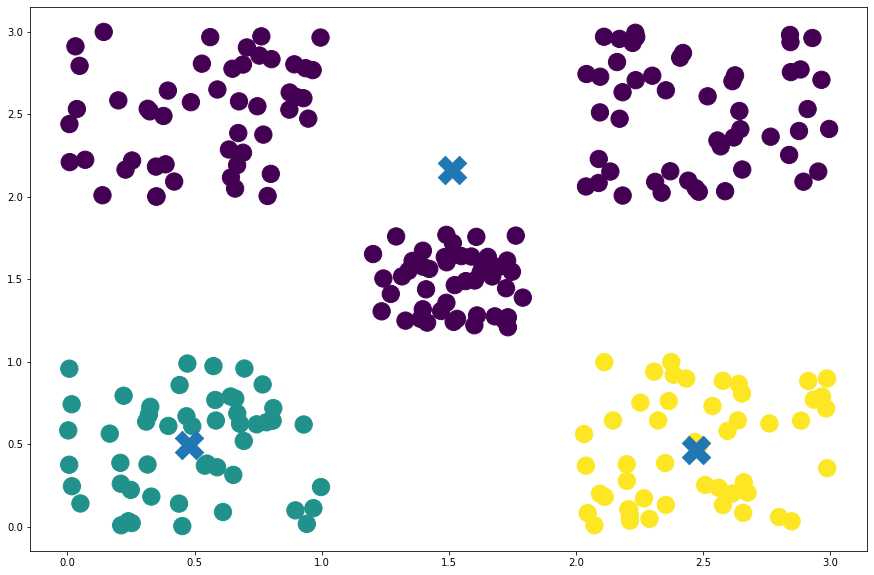

In [76]:
plot_2dclusters(mat, centroids, labels)

## Let's Make a Function

In [77]:
def plot_sil_coe(mat, k):
    # Create and fit model
    km_model = KMeans(k)
    labels = km_model.fit_predict(mat)
    centroids  = km_model.cluster_centers_
    
    # get silhouette scores
    sil_coe = silhouette_samples(mat,labels)
    sil_score = silhouette_score(mat,labels)
    
    # create subplots and define range
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(22, 7)
    low_range = 0
    up_range = 0

    # plot bar plot for each cluster
    for cluster in set(labels):
        cluster_coefs = sil_coe[labels == cluster]
        cluster_coefs.sort()
        up_range += len(cluster_coefs)
        ax[0].barh(range(low_range, up_range), cluster_coefs, height = 1)
        ax[0].text(-0.05,(up_range +low_range)/2, str(cluster))
        low_range += len(cluster_coefs)
    
    # plot data and centorids
    ax[1].scatter(mat[:, 0], mat[:, 1], marker='.', s=200,c=labels)
    ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='X',
                c="Black", s=400)

    plt.suptitle("Silhouette Coefficients for k = " + str(k) + " \n Score = " + str(round(sil_score, 2)) , fontsize = 25, y=1)
    ax[0].set_title("Coefficient Plots", fontsize = 20)
    ax[0].set_xlabel("Silhouette Coefficients", fontsize = 20)
    ax[0].set_ylabel("Cluster", fontsize = 20)
    ax[0].axes.yaxis.set_ticks([])
    ax[0].axvline(sil_score, color = "red", linestyle="--")
    ax[1].set_title("Clusters Created", fontsize = 20)
    plt.show()

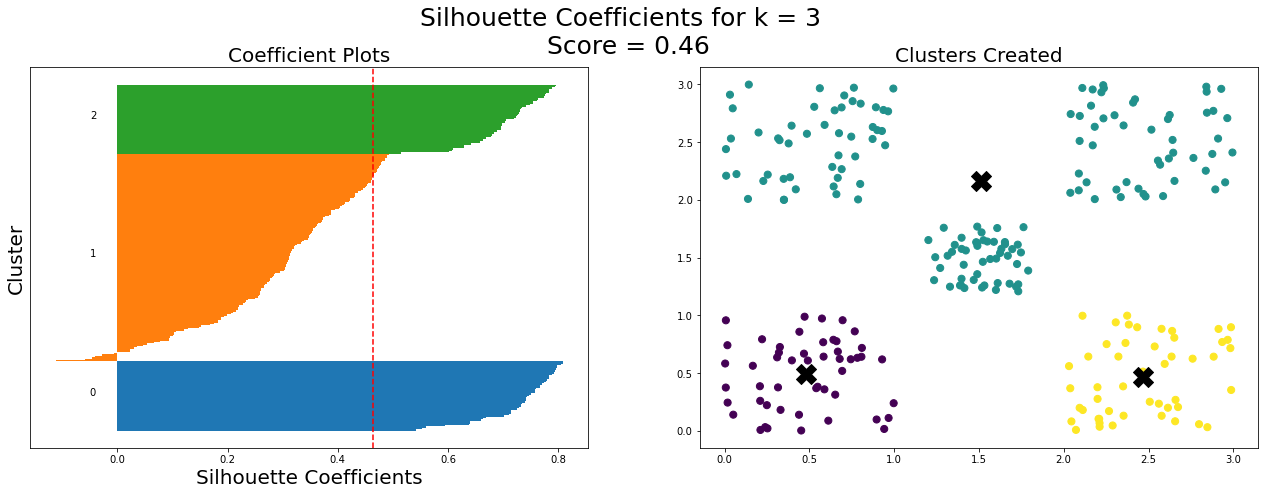

In [78]:
plot_sil_coe(mat, 3)

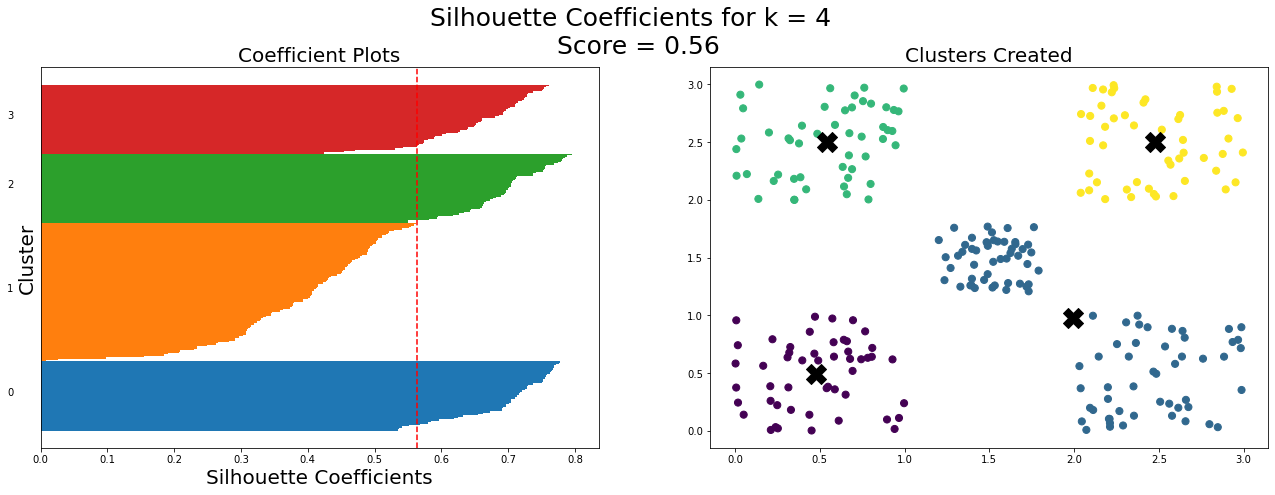

In [79]:
plot_sil_coe(mat, 4)

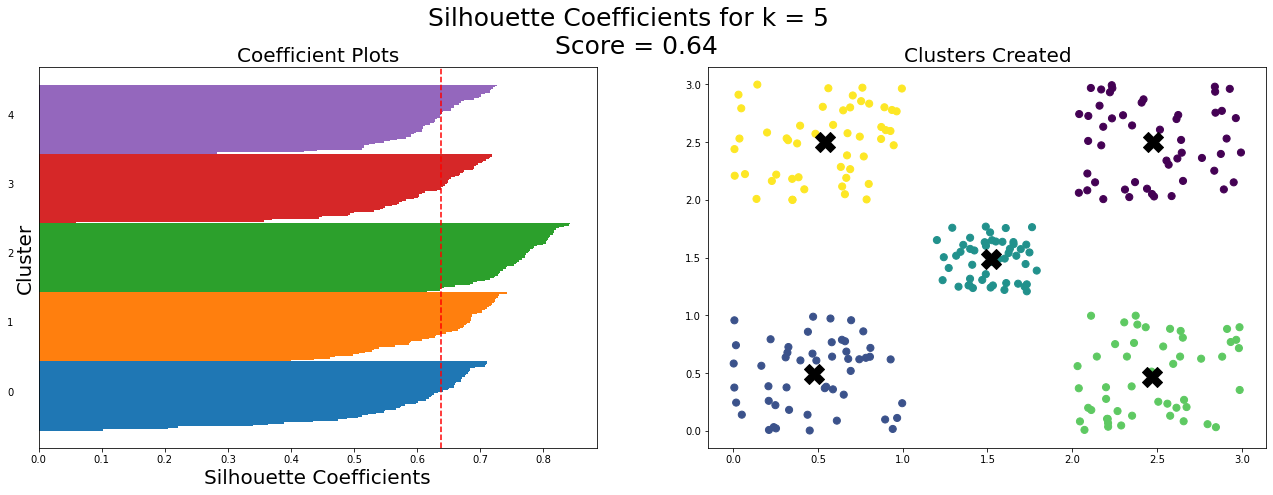

In [80]:
plot_sil_coe(mat, 5)

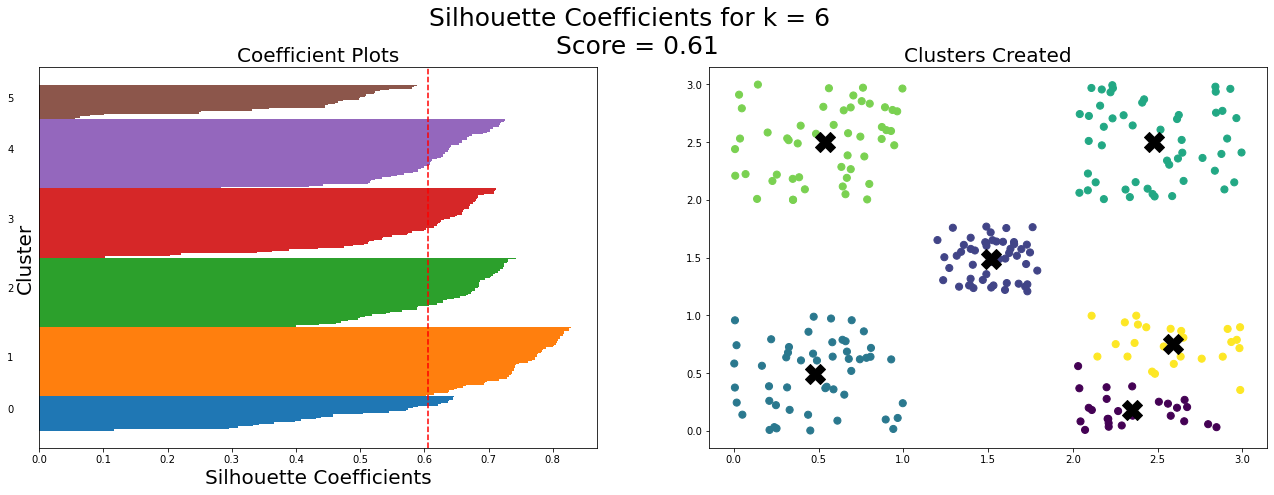

In [81]:
plot_sil_coe(mat, 6)